In [157]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
import os
import glob
import copy

from BSA3_pack import *

from struct import unpack
from scipy import signal
from tqdm import tqdm_notebook
from astropy import units as u
from astropy.time import Time
from astropy.coordinates import Angle
from itertools import permutations


import numpy as np
import matplotlib.pyplot as plt

In [99]:
%%time
big_filename = './data_pntht/1133+16/010618_21_N2_00.pnthr'
filename = './data_pnt/1133+16/010618_21_N2_00.pnt'
# filename = './data_pnt/1237+25/040518_00_N1_00.pnt'
header, data = read_pnt(big_filename)

Wall time: 2.17 s


In [100]:
print('npoints = ', len(data), '\n',
      'modules = ', len(data[0]), '\n',
      'rays = ', len(data[0][0]), '\n',
      'bands = ', len(data[0][0][0]))

npoints =  288142 
 modules =  6 
 rays =  8 
 bands =  33


In [101]:
obs_points = 3.5*u.min/(float(header['tresolution'][0])*u.millisecond).to(u.min)
print(round(obs_points.value, 0))

16810.0


<Quantity 0.00166571 min>

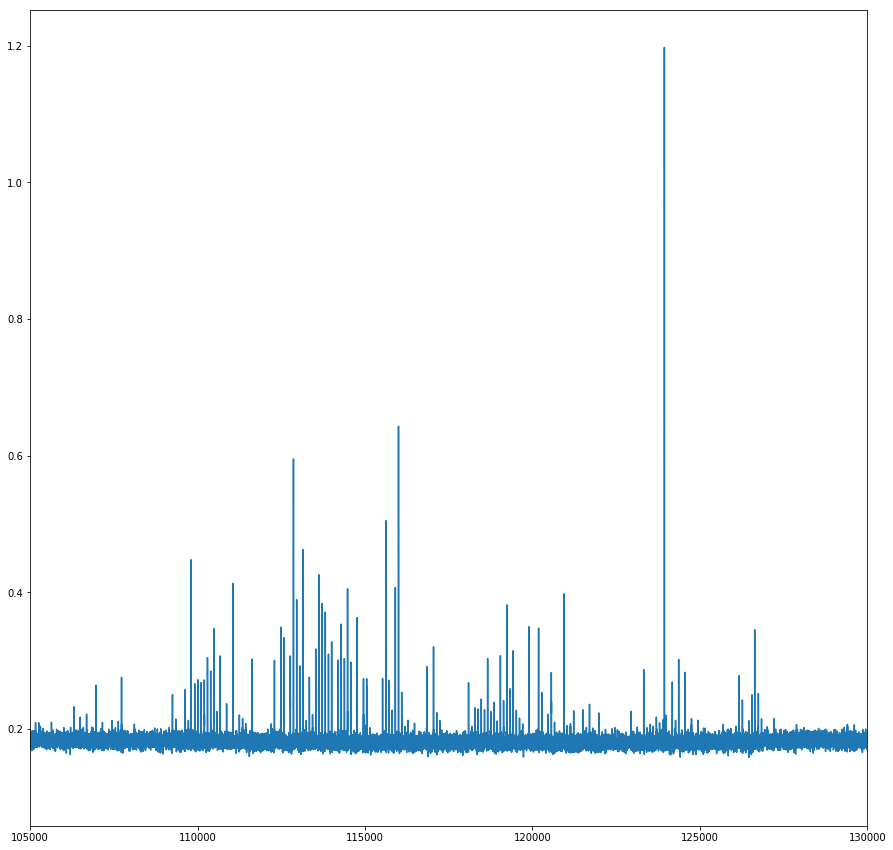

Wall time: 726 ms


In [118]:
%%time
module = 2
ray_1 = 3
#ray_2 = 8
chanel = 7

fig, ax = plt.subplots(figsize=(15, 15))

ax.plot([j[module-1][ray_1-1][chanel-1] for j in data])
#ax.plot([j[module-1][ray_2-1][chanel-1] for j in data])
plt.xlim(105000, 130000)
plt.show()

In [119]:
puls_data = [j[module-1][ray_1-1][chanel-1] for j in data[105000:130000]]

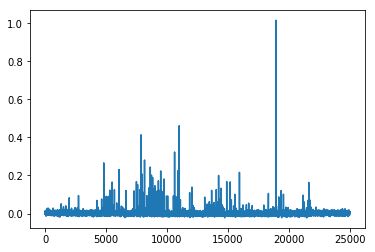

In [120]:
sig = puls_data - np.median(puls_data)
plt.plot(sig)
plt.show()

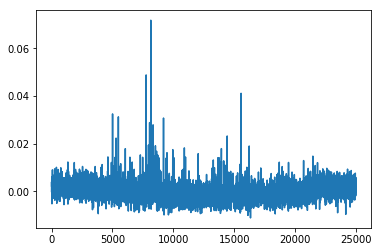

In [121]:
res_filter = signal.medfilt(sig, kernel_size=7)
plt.plot(res_filter)
plt.show()

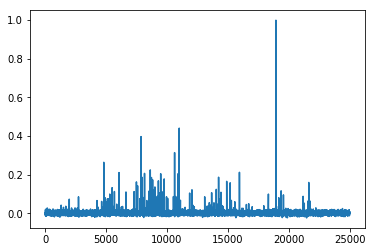

In [122]:
filtred_sig = (sig - res_filter)/max(sig)
plt.plot(filtred_sig)
plt.show()

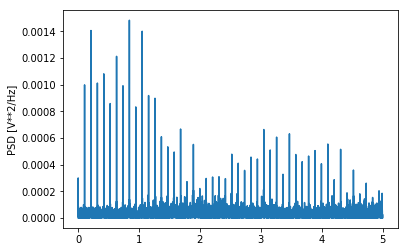

In [130]:
fs = 10 # понять физический смысл этого числа
f, Pxx_den = signal.periodogram(filtred_sig, fs)
plt.plot(f, Pxx_den)
plt.ylabel('PSD [V**2/Hz]')
#plt.ylim(0, 0.00003)
#plt.xlim(0.2, 5)
plt.show()

In [124]:
_, points = np.where([Pxx_den > 0.3*max(Pxx_den)])

In [125]:
for i in points:
    print(f[i], f[i]/f[points[0]], (f[i])/(f[i]/f[points[0]]))

0.1048 1.0 0.1048
0.1052 1.0038167938931297 0.1048
0.21000000000000002 2.00381679389313 0.1048
0.2104 2.0076335877862594 0.1048
0.31520000000000004 3.00763358778626 0.1048
0.3156 3.011450381679389 0.1048
0.4204 4.011450381679389 0.10479999999999999
0.4208 4.015267175572519 0.1048
0.5256000000000001 5.01526717557252 0.1048
0.526 5.019083969465649 0.10479999999999999
0.6308 6.019083969465649 0.10479999999999999
0.6312 6.022900763358778 0.1048
0.736 7.022900763358778 0.1048
0.7364 7.026717557251908 0.1048
0.8412000000000001 8.026717557251908 0.1048
0.9464 9.030534351145038 0.1048
1.0516 10.034351145038169 0.1048
1.1568 11.038167938931299 0.10479999999999999
1.2616 12.038167938931299 0.10479999999999999
1.262 12.041984732824426 0.10480000000000002
1.3668 13.041984732824426 0.1048
1.3672 13.045801526717556 0.1048
1.472 14.045801526717556 0.1048
1.4724000000000002 14.049618320610687 0.1048
1.5772000000000002 15.049618320610687 0.1048
1.6824000000000001 16.053435114503817 0.1048
1.8928 18.061

In [9]:
# Функция для создания последовательности временных значений для оси OX
def get_time(time_start, resolution, point):
    
    time = time_start +  point*float(resolution)*u.millisecond
    return time

In [30]:
time_list = [get_time(header, i) for i in range(int(header['npoints'][0]))]

In [37]:
get_time_begin_and_end(header)

(<Time object: scale='utc' format='isot' value=2019-03-31T20:00:00.0000000>,
 <Time object: scale='utc' format='isot' value=2019-04-01T00:59:59.0000000>)